In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matricesRalas import *

In [2]:
#auxiliares
def generar_idt(m):
    
    B = MatrizRala(m,m)
    for i in range(B.shape[0]):
        B.__setitem__((i,i),1)
    
    return B
       

        
def generar_inv(A): 
    if A.shape[0] != A.shape[1]:
        raise ValueError("la matriz no es cuadrada")
        
    identidad = generar_idt(A)
    resultado = MatrizRala(A.shape[0],A.shape[0])
        
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            resultado[i,j] = A[i,j]
        
    for i in range(A.shape[0]):
        factor = 1.0 / A[i,i]
            
        for j in range(A.shape[0]):
            resultado[i,j] *= factor
            identidad[i,j] *= factor
                
        for k in range(A.shape[0]):
            if k!=i:
                factor = resultado[k,i]
                    
                for j in range(A.shape[0]):
                    resultado[k,j] -= factor*resultado[i,j]
                    identidad[k,j] -= factor*identidad[i,j]
                        
    return identidad   

In [3]:

filas = [0,0,0,1,4,5,5,6,6,6,7,8,9]
columnas = [2,3,4,0,10,6,0,7,8,0,9,5,8]
    #[A,B,C,D,E,F,G,H,I,J,K]
    #[0,1,2,3,4,5,6,7,8,9,10]
    # W ij = 1 , si pj cita a pi i: el citado j: el que cita 
    # [ac][ad][ae] [ba] [ek] [fg, fa] [gh,gi,ga] [hi] [if] [ji]
    # [0,0,0,1,4,5,5,6,6,6,7,8,9]
    # [2,3,4,0,10,6,0,7,8,0,9,5,8]
    # a es citado por c,d,e
    # b es citado por a
    # e es citado por k
    # f es citado po g,a
    # g es citado por h,i,a
    # h es citado por i
    # i es citado por f
    # j es citado por i
    #cj es la cantidad de trabajos citados por el paper pj
W = np.zeros((11, 11))
W[filas,columnas] = 1

   
D = np.zeros((11, 11))
for i in range(len(W)):
    cantidad_1s = 0
    for j in range(len(W)):
        if  W[i,j] == 1:
            cantidad_1s += 1
    if cantidad_1s != 0:
        D[i,i] = round((1/cantidad_1s),2)
        
print(f"W:{W}")
print(f"D:{D}")

W:[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
D:[[0.33 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.5  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.33 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.

In [4]:
##con matrices ralas
#A = I -dWD
#b = (1-d)/n * I
#p* = x

N = W.shape[0]
I = generar_idt(N)
d = 0.85
WD = W @ D
A = I - (d * WD)
b = ((1 - d)/N) * I
p_star = GaussJordan(A,b)

print(p_star)

#p* = (1-d)(I)/N + (d)WDp*
#p*: vector de probabilidades
#N: tamaño de la matriz = cantidad de filas 
#d = probabilidad aleatoria de continuar leyendo alguno de los trabajos citados 
#W =  matriz qu eindic acual paper cito a otro 
#D = matriz que en la diagonal indica la 1/cantidad de veces que ese paper fue citado
#I: matrix identidad


[0.01363636363636364, 0.003825000000000001, 0.0, 0.0, 0.0, 0.005933569617438082, 0.007517182236855902, 0.001821976720654581, 0.002521767087411185, 0.002143502024299507, 0.0]


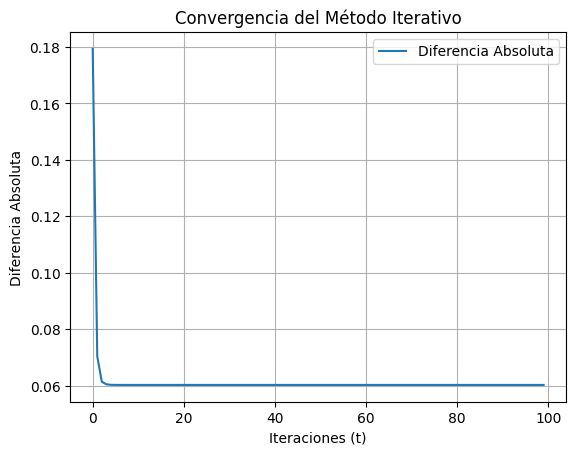

In [10]:
# Método Iterativo
max_iterations = 100
p_t = np.ones((N, 1)) / N  # Distribución equiprobable como probabilidad inicial
diff_abs = []

for t in range(max_iterations):
    p_t_plus_1 = (1 - d) * np.dot(W.T, p_t) + d * b
    diff = np.abs(p_t_plus_1 - p_star)
    diff_abs.append(np.linalg.norm(diff, ord=1))  # Usar norma L1 para la diferencia absoluta
    p_t = p_t_plus_1

# Graficar la diferencia absoluta vs. t
plt.figure()
plt.plot(range(max_iterations), diff_abs, label='Diferencia Absoluta')
plt.xlabel('Iteraciones (t)')
plt.ylabel('Diferencia Absoluta')
plt.title('Convergencia del Método Iterativo')
plt.legend()
plt.grid(True)
plt.show() 
    
    

In [5]:
 ##con numpy
 #p* = (1-d)(I)/N + (d)WDp*
    #p*: vector de probabilidades
    #N: tamaño de la matriz = cantidad de filas 
    #d = probabilidad aleatoria de continuar leyendo alguno de los trabajos citados 
    #W =  matriz qu eindic acual paper cito a otro 
    #D = matriz que en la diagonal indica la 1/cantidad de veces que ese paper fue citado
    #I: matri de unos con R^n
    #reordenado
    #A = (I - dWD)
    #x = p*
    #b = (1-d)I/N
    
d = 0.85
N = W.shape[0]
I = np.eye(N)

A = I - (d*(np.dot(W,D)))
    
A_1 = np.linalg.pinv(A)
    
    
b = ((1-d)/N)*I
 
p_star = np.dot(A_1,b)


print(p_star)
    


[[ 1.36363636e-02  4.13009667e-18 -8.10794867e-19 -2.12029374e-18
   1.15909091e-02  5.33350187e-18  6.29937154e-18  2.51633607e-18
   7.23541345e-18  2.67781431e-18  0.00000000e+00]
 [ 3.82500000e-03  1.36363636e-02  3.69185374e-18  4.72775281e-18
   3.25125000e-03  5.58500057e-18  1.07207507e-18  1.81810437e-18
  -1.80015501e-18  8.75678703e-19  0.00000000e+00]
 [-2.42034586e-18 -5.59137967e-18  1.36363636e-02 -3.23027324e-18
  -3.09307898e-18 -1.51664478e-18 -6.94482924e-19 -3.52090066e-18
  -7.74228476e-18  3.52893439e-19  0.00000000e+00]
 [ 3.32961671e-19  2.99689328e-18  7.09993475e-19  1.36363636e-02
  -2.36548260e-19 -2.22808088e-18 -1.76333930e-18 -5.09675442e-18
  -8.41377201e-19 -1.45264251e-18  0.00000000e+00]
 [ 7.19055960e-18  2.53464111e-18 -2.34108629e-19 -2.27648901e-18
   1.36363636e-02 -7.70425439e-20  2.37623482e-18 -2.83259558e-18
   6.19665159e-18  2.61330386e-18  0.00000000e+00]
 [ 5.93356962e-03  6.80205652e-18 -1.97798388e-18 -4.50206519e-18
   5.04353417e-03  

In [7]:
### codigo guido

In [8]:

def getMatDNump(W:np.ndarray)->np.ndarray:
    D = np.zeros_like(W)
    for i in range(D.shape[0]):
        D[i,i] = sum(W[i,:])
    return D
    
def nextP(P:np.ndarray,W,D,d)->np.ndarray:
    termino_1 = 1-d / W.shape[0]
    termino_1 = np.zeros_like(P) + 1 * termino_1
    termino_2 = d * W @ D @ P
    return termino_1 + termino_2


In [9]:

def mainNumpy():
    N = 11
    d = 0.85
    W = np.zeros((N,N))
    P = np.zeros((N,1)) + 1

    # CITAS A-0
    W[0][2] = 1
    W[0][3] = 1
    W[0][4] = 1

    # CITAS B-1
    W[1][0] = 1

    # CITAS C-2

    # CITAS D-3

    # CITAS E-4
    W[4][10] = 1

    # CITAS F-5
    W[5][0] = 1
    W[5][6] = 1

    # CITAS G-6
    W[6][7] = 1
    W[6][8] = 1

    # CITAS H-7
    W[7][8] = 1

    # CITAS I-8
    W[8][5] = 1

    # CITAS J-9
    W[9][8] = 1
 

    # CITAS K-10

    print(W,sep="\n")
    print(P)
    
    D = getMatDNump(W)
    print(f"D{D}")

    print("INICIO: \n")
    print(P)
    for i in range(10):
        newP = nextP(P,W,D,d)
        # print(newP - P)
        print("DIF: ")
        print(sum(newP - P))
        P = newP









    

    # print(W)
    # print(type(W))

    pass

def main():
    N = 11
    d = 0.85
    #W = MatrizRala(N,N)

    

    print(W._repr_())

    pass

if __name__ == "__main__":
    mainNumpy()
    # main()

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
D[[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
INICIO: 

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
DIF: 
[11.9]
DIF: 
[18.52227273]
DIF: 
[30.42710227]
DIF: 
[4